# Continuous Control

---

## DRL Project 2
Qian Sun

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.16 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. My Implementation

Firstly, we import some necessary dependencies.

In [5]:
import gym, random, torch, time
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

In [6]:
# choose the random state to be 3
agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=3)

In [7]:
def ddpg(n_episodes=2000, max_t=1000, print_every=10):
    scores_deque = deque(maxlen=100)
    scores = []
    for i_episode in range(1, n_episodes+1):
        current_scores = np.zeros(num_agents) 
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        
        agent.reset()
        start_time = time.time()
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done

            agent.step(states=states, actions=actions, rewards=rewards, next_states=next_states, dones=dones)
            current_scores += np.array(rewards)
            states = next_states
            if np.any(dones):
                break

        score = np.mean(current_scores)
        scores_deque.append(score)
        scores.append(score)
        average_score = np.mean(scores_deque)
        
        print('\rEpisode {} ({}s) \tAverage Score: {:.2f} \tCurrent Score: {:.2f}'.format(i_episode, int(time.time()-start_time), average_score, score), end="")
        if i_episode % print_every == 0:
            print('\rEpisode {} \tAverage Score: {:.2f} \tAverage Bin Score: {:.2f}'.format(i_episode, average_score, np.mean(scores[-print_every:])))
        if average_score >= 30.0:
            print('\nEnvironment solved in {} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, average_score))
            torch.save(agent.actor_local.state_dict(), 'actor.pth')
            torch.save(agent.critic_local.state_dict(), 'critic.pth')
            break
    return scores

In [8]:
tic = time.time()
scores = ddpg()
toc = time.time()
print("Runtime (in seconds) %d" % int(toc-tic))

Episode 10 	Average Score: 0.98 	Average Bin Score: 0.9856
Episode 20 	Average Score: 2.08 	Average Bin Score: 3.1993
Episode 30 	Average Score: 3.53 	Average Bin Score: 6.4124
Episode 40 	Average Score: 7.20 	Average Bin Score: 18.2181
Episode 50 	Average Score: 12.72 	Average Bin Score: 34.7928
Episode 60 	Average Score: 17.05 	Average Bin Score: 38.7100
Episode 70 	Average Score: 20.20 	Average Bin Score: 39.1140
Episode 80 	Average Score: 22.61 	Average Bin Score: 39.4854
Episode 90 	Average Score: 24.49 	Average Bin Score: 39.4948
Episode 100 	Average Score: 25.98 	Average Bin Score: 39.4031
Episode 110 	Average Score: 29.81 	Average Bin Score: 39.3116
Episode 111 (15s) 	Average Score: 30.18 	Current Score: 38.16
Environment solved in 11 episodes!	Average Score: 30.18
Runtime (in seconds) 1622


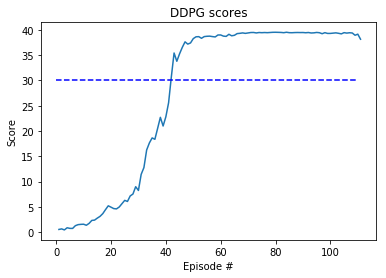

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
horiz_line_data = np.array([30 for i in np.arange(len(scores))])
plt.plot(np.arange(len(scores)), horiz_line_data, 'b--') 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('results/ddpg_scores.png', bbox_inches='tight')
plt.title('DDPG scores')
plt.show()

### Misc: Some failed/unfinished trials with other paramter sets

In [ ]:
!pip freeze > requirements.txt

Episode 10 	Average Score: 0.87 	Average Bin Score: 0.8723
Episode 20 	Average Score: 1.15 	Average Bin Score: 1.4288
Episode 30 	Average Score: 1.44 	Average Bin Score: 2.0405
Episode 40 	Average Score: 1.76 	Average Bin Score: 2.7027
Episode 50 	Average Score: 2.20 	Average Bin Score: 3.9824
Episode 60 	Average Score: 2.58 	Average Bin Score: 4.4575
Episode 70 	Average Score: 2.94 	Average Bin Score: 5.1077
Episode 80 	Average Score: 3.19 	Average Bin Score: 4.9248
Episode 90 	Average Score: 3.44 	Average Bin Score: 5.5015
Episode 100 	Average Score: 3.79 	Average Bin Score: 6.9550
Episode 110 	Average Score: 4.49 	Average Bin Score: 7.7900
Episode 120 	Average Score: 5.20 	Average Bin Score: 8.5787
Episode 130 	Average Score: 5.89 	Average Bin Score: 8.92610
Episode 140 	Average Score: 6.59 	Average Bin Score: 9.70564
Episode 150 	Average Score: 7.04 	Average Bin Score: 8.5183
Episode 160 	Average Score: 7.45 	Average Bin Score: 8.5020
Episode 170 	Average Score: 7.95 	Average Bin S

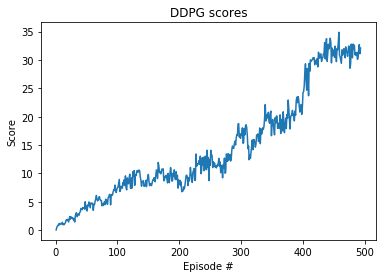

In [8]:
tic = time.time()
scores = ddpg()
toc = time.time()
print("Runtime (in seconds) %d" % int(toc-tic))

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('results/ddpg_scores.png', bbox_inches='tight')
plt.title('DDPG scores')
plt.show()

In [ ]:
tic = time.time()
scores = ddpg()
toc = time.time()
print("Runtime (in seconds) %d" % int(toc-tic))

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('results/ddpg_scores.png', bbox_inches='tight')
plt.title('DDPG scores')
plt.show()

Episode 10 	Average Score: 0.87 	Average Bin Score: 0.8723
Episode 20 	Average Score: 1.15 	Average Bin Score: 1.4288
Episode 30 	Average Score: 1.44 	Average Bin Score: 2.0405
Episode 40 	Average Score: 1.76 	Average Bin Score: 2.7027
Episode 50 	Average Score: 2.20 	Average Bin Score: 3.9824
Episode 60 	Average Score: 2.58 	Average Bin Score: 4.4575
Episode 70 	Average Score: 2.94 	Average Bin Score: 5.1077
Episode 80 	Average Score: 3.19 	Average Bin Score: 4.9248
Episode 90 	Average Score: 3.44 	Average Bin Score: 5.5015
Episode 100 	Average Score: 3.79 	Average Bin Score: 6.9550
Episode 110 	Average Score: 4.49 	Average Bin Score: 7.7900
Episode 120 	Average Score: 5.20 	Average Bin Score: 8.5787
Episode 130 	Average Score: 5.89 	Average Bin Score: 8.92610
Episode 135 (16s) 	Average Score: 6.29 	Current Score: 10.60

In [ ]:
tic = time.time()
scores = ddpg()
toc = time.time()
print("Runtime (in seconds) %d" % int(toc-tic))

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('results/ddpg_scores.png', bbox_inches='tight')
plt.title('DDPG scores')
plt.show()

Episode 10 	Average Score: 0.38 	Average Bin Score: 0.382
Episode 20 	Average Score: 0.66 	Average Bin Score: 0.939
Episode 30 	Average Score: 0.95 	Average Bin Score: 1.5493
Episode 40 	Average Score: 1.25 	Average Bin Score: 2.1638
Episode 50 	Average Score: 1.53 	Average Bin Score: 2.6350
Episode 60 	Average Score: 1.64 	Average Bin Score: 2.2058
Episode 70 	Average Score: 1.97 	Average Bin Score: 3.9367
Episode 80 	Average Score: 2.43 	Average Bin Score: 5.6486
Episode 90 	Average Score: 2.78 	Average Bin Score: 5.6094
Episode 100 	Average Score: 3.27 	Average Bin Score: 7.7125
Episode 110 	Average Score: 4.10 	Average Bin Score: 8.6467
Episode 120 	Average Score: 4.95 	Average Bin Score: 9.49.81
Episode 130 	Average Score: 5.81 	Average Bin Score: 10.0727
Episode 140 	Average Score: 6.30 	Average Bin Score: 7.0815
Episode 148 (12s) 	Average Score: 6.72 	Current Score: 9.204

In [ ]:
tic = time.time()
scores = ddpg()
toc = time.time()
print("Runtime (in seconds) %d" % int(toc-tic))

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('results/ddpg_scores.png', bbox_inches='tight')
plt.title('DDPG scores')
plt.show()

Episode 10 	Average Score: 0.72 	Average Bin Score: 0.7280
Episode 20 	Average Score: 1.22 	Average Bin Score: 1.7211
Episode 30 	Average Score: 1.75 	Average Bin Score: 2.8119
Episode 40 	Average Score: 2.29 	Average Bin Score: 3.9208
Episode 50 	Average Score: 2.81 	Average Bin Score: 4.9005
Episode 60 	Average Score: 3.30 	Average Bin Score: 5.7476
Episode 70 	Average Score: 3.81 	Average Bin Score: 6.8981
Episode 80 	Average Score: 4.21 	Average Bin Score: 6.9594
Episode 90 	Average Score: 4.63 	Average Bin Score: 8.07.63
Episode 100 	Average Score: 5.22 	Average Bin Score: 10.516
Episode 110 	Average Score: 6.28 	Average Bin Score: 11.3334
Episode 120 	Average Score: 7.55 	Average Bin Score: 14.3941
Episode 130 	Average Score: 9.11 	Average Bin Score: 18.3755
Episode 140 	Average Score: 11.24 	Average Bin Score: 25.2556
Episode 150 	Average Score: 13.69 	Average Bin Score: 29.3898
Episode 160 	Average Score: 16.03 	Average Bin Score: 29.1600
Episode 170 	Average Score: 18.46 	Aver

In [ ]:
tic = time.time()
scores = ddpg()
toc = time.time()
print("Runtime (in seconds) %d" % int(toc-tic))

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('results/ddpg_scores.png', bbox_inches='tight')
plt.title('DDPG scores')
plt.show()

Episode 10 	Average Score: 1.50 	Average Bin Score: 1.5044
Episode 20 	Average Score: 2.40 	Average Bin Score: 3.3074
Episode 30 	Average Score: 5.40 	Average Bin Score: 11.4157
Episode 40 	Average Score: 8.71 	Average Bin Score: 18.6161
Episode 50 	Average Score: 11.87 	Average Bin Score: 24.5419
Episode 60 	Average Score: 15.00 	Average Bin Score: 30.6260
Episode 70 	Average Score: 17.29 	Average Bin Score: 31.0786
Episode 80 	Average Score: 19.35 	Average Bin Score: 33.7641
Episode 90 	Average Score: 20.86 	Average Bin Score: 32.9217
Episode 100 	Average Score: 21.99 	Average Bin Score: 32.1805
Episode 110 	Average Score: 25.02 	Average Bin Score: 31.7808
Episode 120 	Average Score: 27.58 	Average Bin Score: 28.9393
Episode 130 	Average Score: 29.03 	Average Bin Score: 25.8624
Episode 140 	Average Score: 29.72 	Average Bin Score: 25.5281
Episode 150 	Average Score: 29.93 	Average Bin Score: 26.6464
Episode 160 	Average Score: 29.51 	Average Bin Score: 26.4114
Episode 170 	Average Sc

In [ ]:
tic = time.time()
scores = ddpg()
toc = time.time()
print("Runtime (in seconds) %d" % int(toc-tic))

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('results/ddpg_scores.png', bbox_inches='tight')
plt.title('DDPG scores')
plt.show()

Episode 10 	Average Score: 1.50 	Average Bin Score: 1.5044
Episode 20 	Average Score: 2.40 	Average Bin Score: 3.3074
Episode 30 	Average Score: 5.40 	Average Bin Score: 11.4157
Episode 40 	Average Score: 8.71 	Average Bin Score: 18.6161
Episode 50 	Average Score: 11.87 	Average Bin Score: 24.5419
Episode 60 	Average Score: 15.00 	Average Bin Score: 30.6260
Episode 70 	Average Score: 17.29 	Average Bin Score: 31.0786
Episode 80 	Average Score: 19.35 	Average Bin Score: 33.7641
Episode 90 	Average Score: 20.86 	Average Bin Score: 32.9217
Episode 100 	Average Score: 21.99 	Average Bin Score: 32.1805
Episode 110 	Average Score: 25.02 	Average Bin Score: 31.7808
Episode 120 	Average Score: 27.58 	Average Bin Score: 28.9393


In [ ]:
tic = time.time()
scores = ddpg()
toc = time.time()
print("Runtime (in seconds) %d" % int(toc-tic))

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('results/ddpg_scores.png', bbox_inches='tight')
plt.title('DDPG scores')
plt.show()

Episode 10 |	Average Score: 1.21 	Current Score: 1.66: 1.66
Episode 20 |	Average Score: 1.73 	Current Score: 2.73: 2.73
Episode 30 |	Average Score: 1.99 	Current Score: 2.87: 2.87
Episode 40 |	Average Score: 2.55 	Current Score: 4.64: 4.64
Episode 50 |	Average Score: 3.13 	Current Score: 6.79: 6.79
Episode 60 |	Average Score: 3.97 	Current Score: 9.08: 9.08
Episode 70 |	Average Score: 4.75 	Current Score: 12.33 12.33
Episode 80 |	Average Score: 5.61 	Current Score: 10.97 10.97
Episode 90 |	Average Score: 6.17 	Current Score: 8.84: 8.846
Episode 100 |	Average Score: 6.43 	Current Score: 7.86: 7.86
Episode 110 |	Average Score: 7.16 	Current Score: 8.32: 8.326
Episode 120 |	Average Score: 8.22 	Current Score: 10.35 10.35
Episode 130 |	Average Score: 9.48 	Current Score: 19.33 19.33
Episode 140 |	Average Score: 11.07 	Current Score: 20.22 20.22
Episode 150 |	Average Score: 12.77 	Current Score: 24.35 24.35
Episode 160 |	Average Score: 14.48 	Current Score: 28.97 28.97
Episode 170 |	Average

In [ ]:
tic = time.time()
scores = ddpg()
toc = time.time()
print("Runtime (in seconds) %d" % int(toc-tic))

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('results/ddpg_scores.png', bbox_inches='tight')
plt.title('DDPG scores')
plt.show()

Episode 10	Average Score: 0.48	Score: 0.61
Episode 20	Average Score: 0.45	Score: 0.30
Episode 30	Average Score: 0.46	Score: 0.72
Episode 40	Average Score: 0.66	Score: 1.59
Episode 50	Average Score: 0.97	Score: 2.14
Episode 60	Average Score: 1.34	Score: 3.37
Episode 70	Average Score: 1.83	Score: 5.72
Episode 80	Average Score: 2.35	Score: 6.32
Episode 90	Average Score: 2.97	Score: 8.932
Episode 100	Average Score: 3.77	Score: 13.92
Episode 110	Average Score: 5.18	Score: 14.97
Episode 120	Average Score: 6.78	Score: 17.06
Episode 130	Average Score: 8.60	Score: 17.67
Episode 140	Average Score: 10.35	Score: 20.48
Episode 150	Average Score: 12.24	Score: 22.32
Episode 160	Average Score: 14.07	Score: 21.01
Episode 170	Average Score: 15.79	Score: 20.00
Episode 180	Average Score: 17.56	Score: 25.76
Episode 190	Average Score: 19.32	Score: 26.33
Episode 200	Average Score: 20.91	Score: 26.86
Episode 210	Average Score: 22.15	Score: 26.83
Episode 220	Average Score: 23.22	Score: 27.02
Episode 230	Averag

In [ ]:
tic = time.time()
scores = ddpg()
toc = time.time()
print("Runtime (in seconds) %d" % int(toc-tic))

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('results/ddpg_scores.png', bbox_inches='tight')
plt.title('DDPG scores')
plt.show()

Episode 10	Average Score: 0.53	Score: 0.53
Episode 20	Average Score: 0.59	Score: 0.80
Episode 30	Average Score: 0.60	Score: 0.68
Episode 40	Average Score: 0.67	Score: 1.12
Episode 50	Average Score: 0.80	Score: 1.25
Episode 60	Average Score: 1.04	Score: 2.55
Episode 70	Average Score: 1.33	Score: 3.30
Episode 80	Average Score: 1.67	Score: 4.92
Episode 90	Average Score: 2.12	Score: 7.05
Episode 100	Average Score: 2.73	Score: 11.68
Episode 110	Average Score: 4.15	Score: 14.88
Episode 120	Average Score: 5.90	Score: 19.21
Episode 130	Average Score: 7.91	Score: 21.81
Episode 140	Average Score: 10.17	Score: 25.53
Episode 150	Average Score: 12.63	Score: 26.78
Episode 160	Average Score: 15.05	Score: 27.11
Episode 170	Average Score: 17.47	Score: 27.39
Episode 180	Average Score: 19.79	Score: 27.27
Episode 190	Average Score: 21.96	Score: 27.39
Episode 200	Average Score: 23.87	Score: 27.17
Episode 210	Average Score: 25.09	Score: 26.36
Episode 220	Average Score: 25.96	Score: 27.10
Episode 230	Average